# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

In [3]:
def Error(path, filename, U_obs):
    
    U = np.load(path+filename)

    pc1 = U[0]
    pc2 = U[1]
    pc3 = U[2]
    pc4 = U[3]
    pc5 = U[4]

    E_tmp = (pc1-U_obs[0])**2 + (pc2-U_obs[1])**2 + (pc3-U_obs[2])**2 + (pc4-U_obs[3])**2 + (pc5-U_obs[4])**2
    E = sqrt(E_tmp/5)
    return E

In [4]:
def RMSE_emulator(pc1, pc2, pc3, pc4, pc5) : 
    
    U_obs = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/U_obs_LW.npy')
    
    E_pc1 = []
    E_pc2 = []
    E_pc3 = []
    E_pc4 = []
    E_pc5 = []
    E_tmp = []

    for i in pc1:
        tmp = (i-U_obs[0])**2
        E_pc1.append(tmp)
    
    for j in pc2:
        tmp = (j-U_obs[1])**2
        E_pc2.append(tmp)

    for k in pc3:
        tmp = (k-U_obs[2])**2
        E_pc3.append(tmp)
    
    for l in pc4:
        tmp = (l-U_obs[3])**2
        E_pc4.append(tmp)
    
    for m in pc5:
        tmp = (m-U_obs[4])**2
        E_pc5.append(tmp)

    for n in range(0,len(E_pc1),1) :    
        tmp = E_pc1[n]+E_pc2[n]+E_pc3[n]+E_pc4[n]+E_pc5[n]
        E_tmp.append(tmp/5)

    
    E = sqrt(E_tmp)
    
    
    return E

In [5]:
def Error_emulator(pc1, pc2, pc3, pc4, pc5):
    U_obs = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/U_obs_LW.npy')
    E_tmp = (pc1-U_obs[0])**2 + (pc2-U_obs[1])**2 + (pc3-U_obs[2])**2 + (pc4-U_obs[3])**2 + (pc5-U_obs[4])**2
    E = sqrt(E_tmp/5)
    return E

In [6]:
def MultiLinReg_pred_eof1(x) :

    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_LW.npy")
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")
    
    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]

    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

def MultiLinReg_pred_eof2(x) :

    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_LW.npy")
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")
    
    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]

    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

def MultiLinReg_pred_eof3(x) :

    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_LW.npy")
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]

    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

def MultiLinReg_pred_eof4(x) :

    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_LW.npy")
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")
    
    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]

    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

def MultiLinReg_pred_eof5(x) :

    X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
    y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_LW.npy")
    param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")
    
    # Let's use the model equation : 

    X_df = pd.DataFrame(data=X)
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    R = regr.intercept_
    Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]

    tmp = Coeffs.values*x
    y_pred = tmp.sum()+R
    
    return y_pred

# Récupérer U_obs

In [7]:
U_obs = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/U_obs_LW.npy')
U_obs

array([-0.90530056,  2.34117   , -1.7348833 ,  1.7361926 ,  0.22081728],
      dtype=float32)

In [8]:
pc1_obs = U_obs[0]
pc2_obs = U_obs[1]
pc3_obs = U_obs[2]
pc4_obs = U_obs[3]
pc5_obs = U_obs[4]

# official, membre p1

In [9]:
pc1_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF1pc_LW.npy')
pc2_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF2pc_LW.npy')
pc3_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF3pc_LW.npy')
pc4_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF4pc_LW.npy')
pc5_p1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF5pc_LW.npy')

p1_feedbacks = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_p1.npy')

In [10]:
E_p1_tmp = (pc1_p1-pc1_obs)**2 + (pc2_p1-pc2_obs)**2 + (pc3_p1-pc3_obs)**2 + (pc4_p1-pc4_obs)**2 + (pc5_p1-pc5_obs)**2
E_p1 = sqrt(E_p1_tmp/5)
        
print(E_p1)

1.0101255227913022


In [11]:
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/E_p1_LW.npy', E_p1)

# CFMIP6 models

In [12]:
path = '/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/'

filename = 'U_MRI_LW.npy'
E_MRI = Error(path, filename, U_obs)

filename = 'U_CAN_LW.npy'
E_CAN = Error(path, filename, U_obs)

filename = 'U_MIROC_LW.npy'
E_MIROC = Error(path, filename, U_obs)

filename = 'U_HadGEM3_LW.npy'
E_HadGEM3 = Error(path, filename, U_obs)

filename = 'U_IPSL_LW.npy'
E_IPSL = Error(path, filename, U_obs)

filename = 'U_BCC_LW.npy'
E_BCC = Error(path, filename, U_obs)

# PPE

In [13]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_LW.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_LW.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_LW.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_LW.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_LW.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

In [14]:
pc1_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_LW.npy')
pc2_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_LW.npy')
pc3_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_LW.npy')
pc4_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_LW.npy')
pc5_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_LW.npy')

PC_df_PPE = pd.DataFrame(pc1_PPE)
PC_df_PPE['pc1'] = pc1_PPE
PC_df_PPE['pc2'] = pc2_PPE
PC_df_PPE['pc3'] = pc3_PPE
PC_df_PPE['pc4'] = pc4_PPE
PC_df_PPE['pc5'] = pc5_PPE
PC_df_PPE = PC_df_PPE.drop(labels = 0, axis=1)
PC_df_PPE

,pc1,pc2,pc3,pc4,pc5
0,-0.739219,0.068012,0.231087,-0.114967,-2.073620
1,0.336901,-0.589367,1.022992,0.410326,0.460474
2,1.772028,0.713022,0.389880,0.341204,-0.621712
3,0.602520,-1.191535,1.601341,-0.169788,0.693402
4,0.675742,-0.056017,-0.160190,1.804740,-0.257126
...,...,...,...,...,...
97,-0.303779,-0.121118,1.087760,0.318875,0.982107
98,-0.210095,-1.715702,-1.029760,1.346775,1.742032
99,0.184986,-0.692581,-0.455570,0.427989,0.221776
100,0.761945,-0.390530,0.032001,0.808282,-0.055405


## Calcul de biais CERES

In [15]:
E_PPE = RMSE_emulator(pc1_PPE, pc2_PPE, pc3_PPE, pc4_PPE, pc5_PPE)
E_PPE

array([1.88420289, 1.97749088, 1.84333521, 2.43885287, 1.4804719 ,
       1.41633398, 2.21581157, 1.67895342, 2.11174503, 2.07398653,
       1.91139034, 2.55254721, 1.49473472, 1.92699475, 1.82349081,
       1.58179619, 1.43830914, 1.51296919, 1.75882594, 1.35637166,
       1.93848833, 2.01149481, 1.21828633, 1.44651822, 1.16056203,
       1.8101556 , 1.31077219, 1.64796608, 1.85344922, 2.38598441,
       1.69513156, 2.19250001, 1.20385571, 1.71631793, 1.34098753,
       1.84449115, 2.09398676, 1.54439209, 1.47427427, 1.93650244,
       1.80178656, 2.03051145, 2.15142307, 1.88264971, 2.3270275 ,
       2.22880084, 2.01849171, 2.45253977, 2.26138901, 2.33894427,
       1.8464643 , 1.02000611, 2.29697111, 2.38904275, 1.94350177,
       1.90285579, 1.56797673, 2.20098653, 1.79480905, 1.81124469,
       1.61990577, 1.74048937, 2.60611109, 1.74641252, 1.55157266,
       2.58431887, 1.76783523, 1.68767292, 1.44109965, 1.59657027,
       1.40388115, 1.83475885, 1.96663671, 1.47928625, 1.69615

# Multi-Linear Regression predictions

## Import PCs and EOFs

In [16]:
pc1_pred = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof1_LW.npy')
pc2_pred = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof2_LW.npy')
pc3_pred = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof3_LW.npy')
pc4_pred = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof4_LW.npy')
pc5_pred = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof5_LW.npy')

PC_df = pd.DataFrame(pc1_pred)
PC_df['pc1'] = pc1_pred
PC_df['pc2'] = pc2_pred
PC_df['pc3'] = pc3_pred
PC_df['pc4'] = pc4_pred
PC_df['pc5'] = pc5_pred
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

pc1_pred = PC_df['pc1'].to_xarray().rename({'index':'mode'})
pc2_pred = PC_df['pc2'].to_xarray().rename({'index':'mode'})
pc3_pred = PC_df['pc3'].to_xarray().rename({'index':'mode'})
pc4_pred = PC_df['pc4'].to_xarray().rename({'index':'mode'})
pc5_pred = PC_df['pc5'].to_xarray().rename({'index':'mode'})

In [17]:
pc1_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof1_LW.npy')
pc2_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof2_LW.npy')
pc3_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof3_LW.npy')
pc4_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof4_LW.npy')
pc5_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof5_LW.npy')

PC_val_df = pd.DataFrame(pc1_val)
PC_val_df['pc1'] = pc1_val
PC_val_df['pc2'] = pc2_val
PC_val_df['pc3'] = pc3_val
PC_val_df['pc4'] = pc4_val
PC_val_df['pc5'] = pc5_val
PC_val_df = PC_val_df.drop(labels = 0, axis=1)
#PC_df

pc1_val = PC_val_df['pc1'].to_xarray().rename({'index':'mode'})
pc2_val = PC_val_df['pc2'].to_xarray().rename({'index':'mode'})
pc3_val = PC_val_df['pc3'].to_xarray().rename({'index':'mode'})
pc4_val = PC_val_df['pc4'].to_xarray().rename({'index':'mode'})
pc5_val = PC_val_df['pc5'].to_xarray().rename({'index':'mode'})

## Calcul de biais CERES

In [18]:
E_multilinreg_val = RMSE_emulator(pc1_val, pc2_val, pc3_val, pc4_val, pc5_val)
E_multilinreg_val

array([1.70523219, 1.96856338, 1.85154914, 2.23781918, 1.63816574,
       1.10122691, 1.89583321, 1.23161671, 1.90840921, 1.81902615,
       1.84299926, 2.36580035, 1.84357046, 1.72436126, 2.01460099,
       1.68705613, 1.80805971, 1.60813019, 1.76937552, 1.32340057,
       2.002638  , 2.00069185, 1.3336885 , 1.1055422 , 1.30981653,
       1.73146177, 1.2760551 , 1.63259912, 1.73938121, 2.48374019,
       1.57649571, 2.25816009, 1.35059022, 1.74288456, 1.18724287,
       2.03179508, 1.87115456, 1.12486534, 1.30706956, 1.81059147,
       1.76169762, 2.27596671, 2.06274793, 1.76755189, 2.06329852,
       1.93157735, 1.9178495 , 2.06005791, 1.83364651, 2.11553308,
       1.77164675, 1.3330901 , 2.38551218, 2.3492606 , 2.00908385,
       1.44752473, 1.63247594, 1.79309657, 1.79003616, 1.8335522 ,
       1.11877806, 1.67790807, 2.34876935, 1.83429905, 1.47718105,
       2.17778183, 1.80706469, 1.37720547, 1.66019938, 1.6335306 ,
       1.59234027, 1.98327469, 1.9045263 , 1.17799804, 1.85708

In [19]:
E_multilinreg_pred = RMSE_emulator(pc1_pred, pc2_pred, pc3_pred, pc4_pred, pc5_pred)
E_multilinreg_pred

array([1.58710329, 1.82072013, 1.60396779, ..., 1.64197015, 1.26968198,
       1.39399975])

# LASSO predictions

In [20]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof1_LW.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof2_LW.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof3_LW.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof4_LW.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof5_LW.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

pc1 = PC_df['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df['pc5'].to_xarray().rename({'index':'mode'})

In [21]:
pc1_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof1_LW.npy')
pc2_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof2_LW.npy')
pc3_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof3_LW.npy')
pc4_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof4_LW.npy')
pc5_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof5_LW.npy')

PC_val_df_LASSO = pd.DataFrame(pc1_val)
PC_val_df_LASSO['pc1'] = pc1_val
PC_val_df_LASSO['pc2'] = pc2_val
PC_val_df_LASSO['pc3'] = pc3_val
PC_val_df_LASSO['pc4'] = pc4_val
PC_val_df_LASSO['pc5'] = pc5_val
PC_val_df_LASSO = PC_val_df_LASSO.drop(labels = 0, axis=1)
#PC_df

pc1_val = PC_val_df_LASSO['pc1'].to_xarray().rename({'index':'mode'})
pc2_val = PC_val_df_LASSO['pc2'].to_xarray().rename({'index':'mode'})
pc3_val = PC_val_df_LASSO['pc3'].to_xarray().rename({'index':'mode'})
pc4_val = PC_val_df_LASSO['pc4'].to_xarray().rename({'index':'mode'})
pc5_val = PC_val_df_LASSO['pc5'].to_xarray().rename({'index':'mode'})

## Calcul de biais CERES

In [22]:
E_lasso_val = RMSE_emulator(pc1_val, pc2_val, pc3_val, pc4_val, pc5_val)
E_lasso_val

array([1.63346152, 1.89593516, 1.71735346, 2.1293633 , 1.5386042 ,
       1.17575613, 1.79653331, 1.31501624, 1.69182763, 1.74711541,
       1.78021727, 2.14973576, 1.7193851 , 1.78609448, 1.83121409,
       1.6764098 , 1.64316805, 1.51525027, 1.69164   , 1.37297664,
       1.96262819, 1.99709581, 1.53309198, 1.22862456, 1.33104176,
       1.64714163, 1.25939761, 1.53695037, 1.64194434, 2.21406575,
       1.54442601, 2.03677581, 1.42894212, 1.67723378, 1.21317263,
       1.87247444, 1.85364726, 1.26123202, 1.37560935, 1.72744051,
       1.71730351, 2.17421742, 2.00632266, 1.80748612, 1.84494486,
       1.80937977, 1.80887925, 2.01710979, 1.79932552, 1.99158947,
       1.60648336, 1.47115924, 2.17356512, 1.96591193, 1.86454104,
       1.42853417, 1.67752709, 1.75047697, 1.73876247, 1.79156616,
       1.20333673, 1.56528765, 2.10349929, 1.68347906, 1.60765568,
       1.95869338, 1.64763145, 1.52189425, 1.55494953, 1.69487866,
       1.56636275, 1.88716729, 1.79442647, 1.2612216 , 1.74235

In [23]:
E_lasso_pred = RMSE_emulator(pc1, pc2, pc3, pc4, pc5)

# Feedbacks + creation DataFrame

In [24]:
Fdbck_PPE = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy")
Fdbck_multilinreg_val = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_FdbckN.npy")
Fdbck_multilinreg_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_FdbckN.npy")
Fdbck_lasso_val = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_FdbckN.npy")
Fdbck_lasso_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_FdbckN.npy")
Fdbck_NN_val = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_FdbckN.npy")
Fdbck_NN_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_FdbckN.npy")


Fdbck_CFMIP = np.load(file='/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/CMIP6_NetFeedbcks.npy')
Fdbck_MRI = Fdbck_CFMIP[1]
Fdbck_CAN = Fdbck_CFMIP[2]
Fdbck_MIROC = Fdbck_CFMIP[3]
Fdbck_HadGEM3 = Fdbck_CFMIP[4]
Fdbck_IPSL = Fdbck_CFMIP[5]
Fdbck_BCC = Fdbck_CFMIP[6]

In [25]:
E_PPE_df = pd.DataFrame(E_PPE, columns=['E_PPE'])
E_PPE_df['Fdbck'] = Fdbck_PPE
#E_PPE_df

In [26]:
print(len(E_multilinreg_pred[0:1000]))
print(len(Fdbck_multilinreg_pred))

1000
100000


In [27]:
#E_multilinreg_val_df = pd.DataFrame(E_multilinreg_val, columns=['E_multilinreg_val'])
#E_multilinreg_val_df['Fdbck_val'] = Fdbck_multilinreg_val
#E_multilinreg_val_df

E_multilinreg_val_df = pd.DataFrame(E_multilinreg_val, columns=['E_multilinreg_val'])
E_multilinreg_val_df['Fdbck_val'] = Fdbck_multilinreg_val

E_multilinreg_pred_df = pd.DataFrame(E_multilinreg_pred[0:100000], columns=['E_multilinreg_pred'])
E_multilinreg_pred_df['Fdbck_pred'] = Fdbck_multilinreg_pred
#E_multilinreg_pred_df

In [28]:
E_lasso_val_df = pd.DataFrame(E_lasso_val, columns=['E_lasso_val'])
E_lasso_val_df['Fdbck_val'] = Fdbck_lasso_val
#E_lasso_val_df

E_lasso_pred_df = pd.DataFrame(E_lasso_pred, columns=['E_lasso_pred'])
E_lasso_pred_df['Fdbck_pred'] = Fdbck_lasso_pred
#E_lasso_pred_df

In [29]:
#E_NN_val_df = pd.DataFrame(E_NN_val, columns=['E_NN_val'])
#E_NN_val_df['Fdbck_val'] = Fdbck_NN_val
#E_NN_val_df

#E_NN_pred_df = pd.DataFrame(E_NN_pred, columns=['E_NN_pred'])
#E_NN_pred_df['Fdbck_pred'] = Fdbck_NN_pred
#E_NN_pred_df

# Create Plot

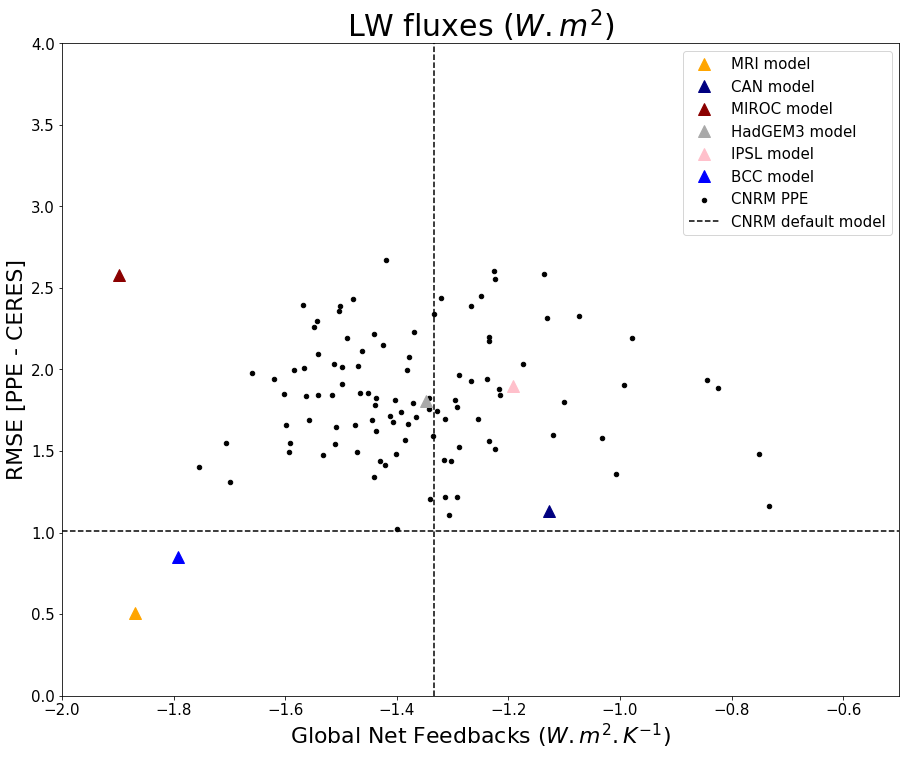

In [30]:
ax = plt.gca()

E_PPE_df.plot(kind='scatter', x='Fdbck', y='E_PPE', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.plot(Fdbck_MRI, E_MRI, color='orange', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_CAN, E_CAN, color='navy', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_MIROC, E_MIROC, color='darkred', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_HadGEM3, E_HadGEM3, color='darkgray', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_IPSL, E_IPSL, color='pink', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_BCC, E_BCC, color='blue', marker='^', linewidth=0, markersize=12)


plt.hlines(E_p1,xmin = -2.0,xmax = 2.0,label='default simulation', colors='black', 
           linestyles='dashed')
plt.vlines(p1_feedbacks,ymin = 0,ymax = 25,label='default simulation', colors='black', 
           linestyles='dashed')

legend = ['MRI model', 'CAN model', 'MIROC model', 'HadGEM3 model', 'IPSL model',
          'BCC model', 'CNRM PPE', 'CNRM default model']

title = 'LW fluxes ($W.m^2$)'
plt.xlabel('Global Net Feedbacks ($W.m^2.K^{-1}$)', fontsize=22)
plt.ylabel('RMSE [PPE - CERES]', fontsize=22)
plt.legend(legend, fontsize=15)
plt.title(title, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,4)
plt.xlim(-2.0,-0.5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/RMSE_LW_PPE.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

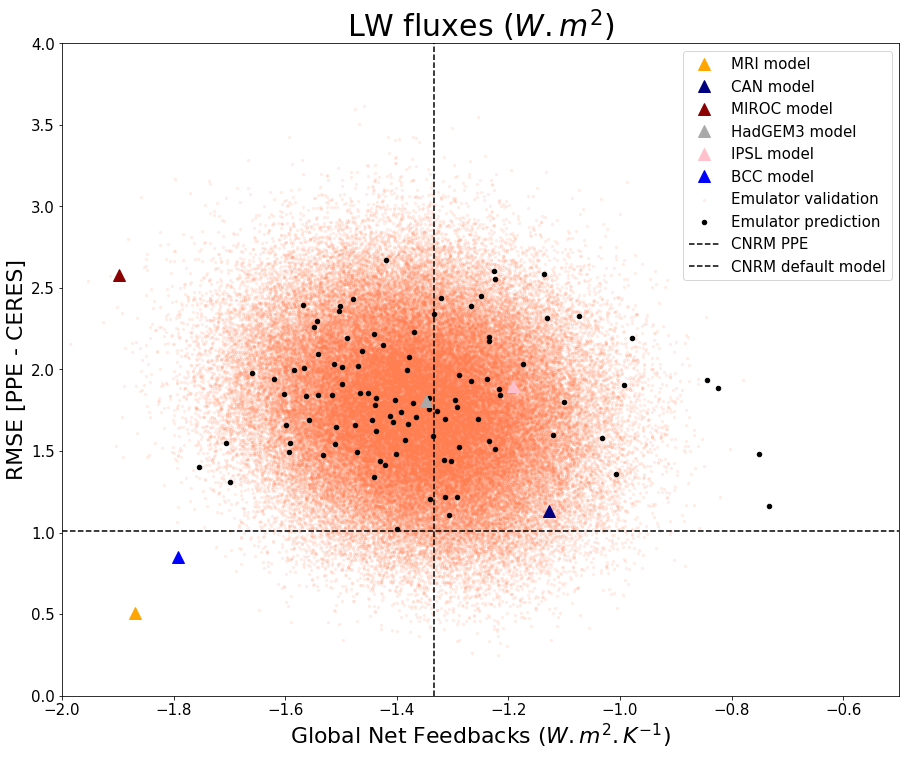

In [31]:
ax = plt.gca()

plt.plot(Fdbck_MRI, E_MRI, color='orange', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_CAN, E_CAN, color='navy', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_MIROC, E_MIROC, color='darkred', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_HadGEM3, E_HadGEM3, color='darkgray', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_IPSL, E_IPSL, color='pink', marker='^', linewidth=0, markersize=12)
plt.plot(Fdbck_BCC, E_BCC, color='blue', marker='^', linewidth=0, markersize=12)

#E_multilinreg_val_df.plot(kind='scatter', x='Fdbck_val', y='E_multilinreg_val', color='red', alpha=1, figsize=(15, 12), 
#                     marker='x', ax = ax)
E_multilinreg_pred_df.plot(kind='scatter', x='Fdbck_pred', y='E_multilinreg_pred', 
                           color='coral', alpha=0.1, figsize=(15, 12), marker='.', ax = ax)


E_PPE_df.plot(kind='scatter', x='Fdbck', y='E_PPE', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)

plt.hlines(E_p1,xmin = -2.0,xmax = 2.0,label='default simulation', colors='black', 
           linestyles='dashed')
plt.vlines(p1_feedbacks,ymin = 0,ymax = 25,label='default simulation', colors='black', 
           linestyles='dashed')

legend = ['MRI model', 'CAN model', 'MIROC model', 'HadGEM3 model', 'IPSL model',
          'BCC model', 'Emulator validation', 'Emulator prediction', 'CNRM PPE', 'CNRM default model']

title = 'LW fluxes ($W.m^2$)'
plt.xlabel('Global Net Feedbacks ($W.m^2.K^{-1}$)', fontsize=22)
plt.ylabel('RMSE [PPE - CERES]', fontsize=22)
plt.legend(legend, fontsize=15)
plt.title(title, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,4)
plt.xlim(-2.0,-0.5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/RMSE_LW_PPE_pred.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [33]:
fluxes_biases = E_PPE_df
fluxes_biases['E_lasso_val'] = E_lasso_val_df['E_lasso_val']
fluxes_biases['E_multilinreg_val'] = E_multilinreg_val_df['E_multilinreg_val']
fluxes_biases['OSE_multilinreg'] = (fluxes_biases['E_PPE'] - fluxes_biases['E_multilinreg_val'])
fluxes_biases['OSE_lasso'] = (fluxes_biases['E_PPE'] - fluxes_biases['E_lasso_val'])
fluxes_biases

,E_PPE,Fdbck,E_lasso_val,E_multilinreg_val,OSE_multilinreg,OSE_lasso
0,1.884203,-0.825236,1.633462,1.705232,0.178971,0.250741
1,1.977491,-1.659636,1.895935,1.968563,0.008927,0.081556
2,1.843335,-1.215000,1.717353,1.851549,-0.008214,0.125982
3,2.438853,-1.321641,2.129363,2.237819,0.201034,0.309490
4,1.480472,-0.750397,1.538604,1.638166,-0.157694,-0.058132
...,...,...,...,...,...,...
97,1.842843,-1.516367,1.710182,1.934828,-0.091984,0.132661
98,1.995217,-1.584491,1.873905,2.100290,-0.105073,0.121313
99,1.657734,-1.474525,1.502050,1.358446,0.299288,0.155683
100,1.691218,-1.445422,1.452653,1.474788,0.216430,0.238565


In [34]:
tmp = sum(fluxes_biases['OSE_multilinreg']*fluxes_biases['OSE_multilinreg'])/len(fluxes_biases)
OSE = sqrt(tmp)
#OSE

np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/OSE_LW.npy', OSE)
OSE

0.20446982325689309

In [35]:
RMSE_LW_val = fluxes_biases['E_multilinreg_val']
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/RMSE_multilinreg_val_LW.npy', RMSE_LW_val)

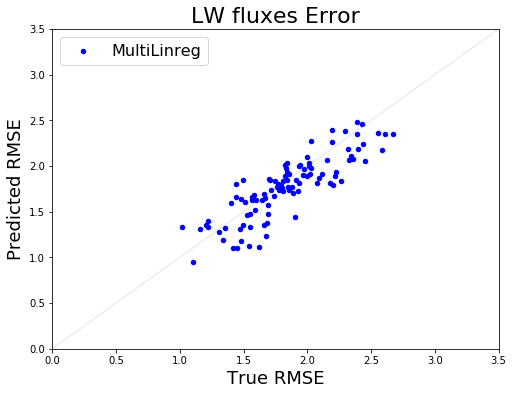

In [36]:
plt.subplots(figsize=(8,20))

#########################
plt.subplot(311)
ax = plt.gca()

title="LW fluxes Error"
fluxes_biases.plot(kind='scatter', x='E_PPE', y='E_multilinreg_val', color='blue',  
                     marker="o", ax = ax)
#fluxes_biases.plot(kind='scatter', x='E_PPE', y='E_lasso_val', color='blue', alpha=0.6, 
#                     marker="o", ax = ax)

plt.xlabel('True RMSE', fontsize = 18)#, fontsize=18)
plt.ylabel('Predicted RMSE', fontsize = 18)#, fontsize=18)
plt.legend(['MultiLinreg', 'LASSO'], fontsize = 16)
plt.title(title, fontsize = 22)#, fontsize=22)
plt.ylim(0,3.5)
plt.xlim(0,3.5)
ax.plot((0, 4), (0, 4), linewidth=1.0, color='gray', alpha=0.2)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/LW_emulator_skill.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

# Select of lowest errors and feedbakcs histograms

In [37]:
E_PPE_short = []
tmp = []
Fdbck_short = []
cpt=0

for i in fluxes_biases['E_PPE']:
    if i <= E_p1:
        E_PPE_short.append(i)
        toto = fluxes_biases['Fdbck'][cpt]
        Fdbck_short.append(toto)
        cpt+=1
        
    else:
        tmp.append(i)
        cpt+=1

PPE_short_df = pd.DataFrame()
PPE_short_df['Fdbck'] = Fdbck_short
PPE_short_df['E_PPE'] = E_PPE_short
#PPE_short_df

In [38]:
E_lasso_short = []
tmp = []
Fdbck_short = []
cpt=0

for i in E_lasso_pred_df['E_lasso_pred']:
    if i <= E_p1:
        E_lasso_short.append(i)
        toto = E_lasso_pred_df['Fdbck_pred'][cpt]
        Fdbck_short.append(toto)
        cpt+=1
        
    else:
        tmp.append(i)
        cpt+=1

lasso_short_df = pd.DataFrame()
lasso_short_df['Fdbck'] = Fdbck_short
lasso_short_df['E_lasso'] = E_lasso_short
#PPE_short_df

In [39]:
E_multilinreg_short = []
tmp = []
Fdbck_short = []
cpt=0

for i in E_multilinreg_pred_df['E_multilinreg_pred']:
    if i <= E_p1:
        E_multilinreg_short.append(i)
        toto = E_multilinreg_pred_df['Fdbck_pred'][cpt]
        Fdbck_short.append(toto)
        cpt+=1
        
    else:
        tmp.append(i)
        cpt+=1

multilinreg_short_df = pd.DataFrame()
multilinreg_short_df['Fdbck'] = Fdbck_short
multilinreg_short_df['E_multilinreg'] = E_multilinreg_short
#PPE_short_df

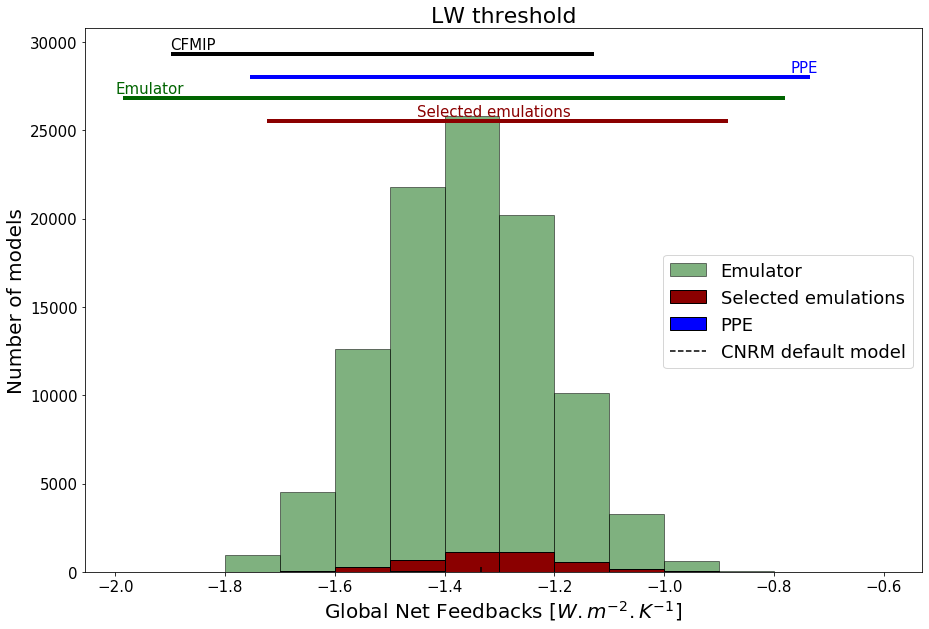

In [40]:
# Create plot of PDF of net feedbacks emulated by neural network 

title = 'LW threshold'

fig, ax = plt.subplots(figsize=(15,10))

Bins = [-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6]

ax = sns.distplot(Fdbck_multilinreg_pred, norm_hist=False, bins = Bins, kde = False, 
                  hist_kws={"alpha": 0.5, "color" : 'darkgreen', "edgecolor" : "black"}, 
                  label = 'Emulator', ax=ax)

ax = sns.distplot(multilinreg_short_df['Fdbck'], norm_hist=False, bins = Bins, kde = False, 
                 hist_kws={"alpha": 1.0, "color" : 'darkred', "edgecolor" : "black"}, 
                  label= 'Selected emulations', ax=ax)

ax = sns.distplot(Fdbck_PPE, norm_hist= False, bins = Bins, kde = False, 
                  hist_kws={"alpha": 1.0, "color" : 'blue', "edgecolor" : "black"}, 
                  label = 'PPE', ax=ax)

#ax = sns.distplot(PPE_short_df['Fdbck'], norm_hist= False, bins = Bins, kde = False, 
#                  hist_kws={"alpha": 0.8, "color" : 'navy', "edgecolor" : "black"}, 
#                  label = 'Best PPE members', ax=ax)

plt.vlines(p1_feedbacks,ymin = 0,ymax = 250,label='CNRM default model', colors='black', 
           linestyles='dashed')

plt.hlines(29300.0,xmin = Fdbck_CFMIP.min(),xmax = Fdbck_CFMIP.max(),
           colors='black', linewidth=4.0, linestyles='solid')
plt.text(-1.9, 29600.0, 'CFMIP', color = 'black', fontsize=15)

plt.hlines(28000.0,xmin = Fdbck_PPE.min(),xmax = Fdbck_PPE.max(),
           colors='blue', linewidth=4.0, linestyles='solid')
plt.text(-0.77, 28300.0, 'PPE', color = 'blue', fontsize=15)

plt.hlines(26800.0,xmin = Fdbck_multilinreg_pred.min(),xmax = Fdbck_multilinreg_pred.max(),
           colors='darkgreen', linewidth=4.0, linestyles='solid')
plt.text(-2.00, 27100.0, 'Emulator', color = 'darkgreen', fontsize=15)

plt.hlines(25500.0,xmin = multilinreg_short_df['Fdbck'].min(),xmax = multilinreg_short_df['Fdbck'].max(),
           colors='darkred', linewidth=4.0, linestyles='solid')
plt.text(-1.45, 25800.0, 'Selected emulations', color = 'darkred', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=18, bbox_to_anchor=(0,0,1,0.6))
plt.title(title, fontsize = 22)
plt.xlabel('Global Net Feedbacks [$W.m^{-2}.K^{-1}$]',fontsize=20)
plt.ylabel('Number of models',fontsize=20)

# Enregistrer la figure ...........

plt.savefig("/data/home/globc/peatier/figures/LW_threshold_feedbacks.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Display the figure 
plt.show()

In [41]:
## SAVE 
E_multilinreg_pred = E_multilinreg_pred_df['E_multilinreg_pred'].values
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/RMSE_multilinreg_pred_LW.npy', E_multilinreg_pred)

E_lasso_pred = E_lasso_pred_df['E_lasso_pred'].values
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/RMSE_lasso_pred_LW.npy', E_lasso_pred)

E_PPE = E_PPE_df['E_PPE'].values
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/RMSE_PPE_LW.npy', E_PPE)